# PD model and scorecard

### Initial preprocessing

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv("C:/Users/Tomasz.Mamok/Downloads/loan_data_2007_2014.csv")
loan_data = loan_data.iloc[:, 1:]

C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2027226989.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("C:/Users/Tomasz.Mamok/Downloads/loan_data_2007_2014.csv")


In [3]:
pd.options.display.max_columns = None

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

In [6]:
loan_data['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [7]:
def to_int(value):
    found = re.findall(r'[0-9]+', str(value))
    if len(found)==1:
        number = found[0]
    else:
        number = np.NaN
    return number

In [8]:
loan_data['emp_length_int'] = loan_data['emp_length'].apply(to_int)

In [9]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [10]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [11]:
loan_data['mths_earliest_cr_line'] = round((pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M'))

In [12]:
loan_data['mths_earliest_cr_line'][loan_data['mths_earliest_cr_line']<0] = np.max(loan_data['mths_earliest_cr_line'])

C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2485523318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_earliest_cr_line'][loan_data['mths_earliest_cr_line']<0] = np.max(loan_data['mths_earliest_cr_line'])


In [13]:
loan_data['term_int'] = loan_data['term'].apply(to_int)

In [14]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

In [15]:
loan_data['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_date'])/np.timedelta64(1, 'M'))

In [16]:
for column in loan_data.columns:
    print(column)
    print(loan_data[column].isnull().sum()/len(loan_data)*100)

id
0.0
member_id
0.0
loan_amnt
0.0
funded_amnt
0.0
funded_amnt_inv
0.0
term
0.0
int_rate
0.0
installment
0.0
grade
0.0
sub_grade
0.0
emp_title
5.916553180994456
emp_length
4.505399058515715
home_ownership
0.0
annual_inc
0.0008578444513548581
verification_status
0.0
issue_d
0.0
loan_status
0.0
pymnt_plan
0.0
url
0.0
desc
72.98154562124023
purpose
0.0
title
0.004289222256774291
zip_code
0.0
addr_state
0.0
dti
0.0
delinq_2yrs
0.006219372272322722
earliest_cr_line
0.006219372272322722
inq_last_6mths
0.006219372272322722
mths_since_last_delinq
53.690554060285024
mths_since_last_record
86.56658481400859
open_acc
0.006219372272322722
pub_rec
0.006219372272322722
revol_bal
0.0
revol_util
0.07291677836516293
total_acc
0.006219372272322722
initial_list_status
0.0
out_prncp
0.0
out_prncp_inv
0.0
total_pymnt
0.0
total_pymnt_inv
0.0
total_rec_prncp
0.0
total_rec_int
0.0
total_rec_late_fee
0.0
recoveries
0.0
collection_recovery_fee
0.0
last_pymnt_d
0.08063737842735666
last_pymnt_amnt
0.0
next_pymnt_

### Dependent variable creation

In [17]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']), 1, 0)

### Independent variables rejection

In [18]:
loan_data = loan_data.drop(columns = ['id', 'member_id', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 
                                      'open_acc_6m', 'open_il_6m', 'issue_d', 'loan_status', 'desc', 'open_il_12m',
                                     'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
                                     'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
                                     'term', 'url', 'emp_length', 'last_pymnt_d', 'issue_date', 'next_pymnt_d',
                                      'last_credit_pull_d', 'earliest_cr_line_date', 'title', 'emp_title', 'application_type',
                                     'earliest_cr_line', 'total_pymnt_inv', 'total_pymnt', 'out_prncp', 'out_prncp_inv', 
                                      'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_amnt',
                                     'total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_issue_d'])
loan_data = loan_data.drop(columns = ['revol_util', 'total_rec_int', 'tot_cur_bal', 'total_rev_hi_lim'])
loan_data = loan_data.drop(columns = ['tot_coll_amt', 'zip_code', 'sub_grade'])

In [19]:
loan_data[loan_data.isnull()] = np.NaN

### Binning and WoE transformation

In [20]:
plt.style.use('ggplot')
class WoE():
    def __init__(self, X, y, column_name, sort=True, sort_by='WoE', is_binned=False):
        self.X = X
        self.y = y
        self.column_name = column_name
        self.sort = sort
        self.sort_by = sort_by
        self.is_binned = is_binned
        data = pd.concat([self.X[self.column_name], self.y], axis=1)

        df = data.groupby(self.column_name, dropna=False).mean().reset_index()
        df.columns = [df.columns[0], 'prop_good']
        df['n_obs'] = data.groupby(self.column_name, dropna=False).count().reset_index().iloc[:, 1]
        df['n_bad'] = data.groupby(self.column_name, dropna=False).sum().reset_index().iloc[:, 1]
        df['n_good'] = df['n_obs'] - df['n_bad']
        df['n_good'] = df['n_good'] + 0.5
        df['n_bad'] = df['n_bad'] + 0.5
        # when data is binned, a column has a specific data format that disables grouping by nulls so this is to cover that
        if self.is_binned:
            data2 = data[data[self.column_name].isnull()]
            data2 = data2.copy()
            data2[self.column_name] = data2[self.column_name].astype('str') # it must be str in order to include nulls in groupby
            df2 = data2.groupby(self.column_name, dropna=False).mean().reset_index()
            df2.columns = [df2.columns[0], 'prop_good']
            df2['n_obs'] = data2.groupby(self.column_name, dropna=False).count().reset_index().iloc[:, 1]
            df2['n_bad'] = data2.groupby(self.column_name, dropna=False).sum().reset_index().iloc[:, 1]
            df2['n_good'] = df2['n_obs'] - df2['n_bad']
            df2['n_good'] = df2['n_good'] + 0.5
            df2['n_bad'] = df2['n_bad'] + 0.5
            if sort:
                df.sort_values(self.column_name) # if data is binned, sort always by the binned column, not WoE
            df = pd.concat([df, df2])
        # Two dataframes are concatenated and other metrics are calculated
        
        df['prop_n_obs'] = df['n_obs']/ df['n_obs'].sum()
        df['prop_n_good'] = df['n_good']/df['n_good'].sum()
        df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
        df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
        df['WoE diff'] = df['WoE'].diff().abs()
        df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])* df['WoE']
        df['IV'] = df['IV'].sum()
        if not self.is_binned:
            df = df.sort_values(self.sort_by)
        # creating of mapping
        df[self.column_name] = df[self.column_name].astype('str')
        self.table = df
        self.IV = pd.unique(df['IV'])[0]
        self.value_to_WoE = dict(list(zip(self.table[self.column_name], self.table['WoE'])))
        if 'nan' in df[self.column_name].values:
            if df['prop_n_obs'][df[self.column_name] == 'nan'].values < 0.05: # if bin with nans is not abundant enough,
                    # give nans WoE of the worst bin
                    worst_WoE = df['WoE'][df[self.column_name] != 'nan'].min()
                    self.value_to_WoE['nan'] = worst_WoE
        
    def plot_WoE(self, x_rotation=0, x_size=12, y_size=6):
        plt.figure(figsize=(x_size, y_size))
        x = self.table[self.column_name]
        y = self.table['WoE']
        if 'nan' in self.table[self.column_name].values:
            # if nans bin is not abundant enough, ignore it while plotting to avoid 
            if self.table['prop_n_obs'][self.table[self.column_name] == 'nan'].values < 0.05:
                x = self.table[self.column_name][self.table[self.column_name] != 'nan']
                y = self.table['WoE'][self.table[self.column_name] != 'nan']
        plt.plot(x.astype('str'), y, linestyle='--', marker='o', color='blue')
        plt.title('WoE for variable ' + self.column_name)
        plt.xticks(rotation=x_rotation)
        plt.xlabel(self.column_name)
        plt.ylabel('Weight of Evidence')
        plt.show()
        
    def transform(self, column):
        # transforms column's value into WoEs
        return column.astype('str').map(self.value_to_WoE).values

In [21]:
class bin_data():

    def __init__(self, column, your_bins=None, n_bins=10):
        self.column = column
        self.n_bins = n_bins
        self.your_bins = your_bins
        if your_bins is None:
            # if bins are not provided, data is binned on the basis of n_bins quantiles
            # pd.qcut is only used for finding edges of bins based on quantiles, but binning itself is covered by
            # pd.cut to ensure that mapping data and transformed data are the same and mapping will be intact
            # (unfortunately there may appear some discrepancies in outputs returned by these two functions)
            self.binned_col, self.bins = pd.qcut(self.column, q=self.n_bins, retbins=True, duplicates='drop')
            self.binned_col = pd.cut(self.column, bins=self.bins)
            self.binned_col = pd.DataFrame(self.binned_col)
        else:
            # if bins are provided, data is binned on the basis of them
            self.binned_col = pd.DataFrame(pd.cut(self.column, bins=self.your_bins))
    def transform(self, new_data):
        if self.your_bins is None:
            return pd.cut(new_data, bins=self.bins).values
        else:
            return pd.cut(new_data, bins=self.your_bins).values

### Splitting dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop(columns=['good_bad']), loan_data['good_bad'], test_size=0.2, stratify=loan_data['good_bad'], random_state=42)

### Exclusion of variables with information value < 0.02

In [23]:
# determines which variables are numerical (continuous) based on the number of distinct values
numerical_vars = []
for col in loan_data.columns:
    number_of_distinct_vals = len(pd.unique(loan_data[col]))
    if number_of_distinct_vals > 30:
        numerical_vars.append(col)

In [24]:
numerical_vars = [var for var in numerical_vars if var not in ['sub_grade', 'zip_code', 'addr_state']]

In [25]:
# determines continuous variables to delete
num_vars_to_delete = []
for var in numerical_vars:
    binned_var = bin_data(X_train[var]).binned_col
    WoE_var = WoE(binned_var, y_train, var, sort=False, is_binned=True)
    if WoE_var.IV < 0.02:
        num_vars_to_delete.append(var)

In [26]:
num_vars_to_delete

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'revol_bal',
 'total_acc',
 'mths_since_last_major_derog',
 'mths_earliest_cr_line']

In [27]:
# determines categorical values to delete
cat_vars_to_delete = []
cat_vars = [var for var in loan_data.columns if var not in numerical_vars and var not in ['good_bad']]
for var in cat_vars:
    WoE_var = WoE(X_train, y_train, var)
    if WoE_var.IV < 0.02:
        cat_vars_to_delete.append(var)
    

In [28]:
cat_vars_to_delete

['pymnt_plan',
 'addr_state',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'emp_length_int']

In [29]:
all_vars_to_delete = num_vars_to_delete + cat_vars_to_delete

In [30]:
X_train.drop(columns= all_vars_to_delete, inplace=True)
X_test.drop(columns= all_vars_to_delete, inplace=True)

In [31]:
X_train.head()

,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term_int
106734,6.03,A,MORTGAGE,85000.0,Verified,debt_consolidation,8.26,0.0,w,36
183573,22.47,E,MORTGAGE,110000.0,Verified,debt_consolidation,19.17,3.0,w,60
52853,8.90,A,MORTGAGE,110700.0,Not Verified,debt_consolidation,19.02,0.0,w,36
399347,14.16,C,OWN,53110.0,Verified,credit_card,34.21,0.0,w,36
143199,14.33,C,RENT,30000.0,Verified,debt_consolidation,13.64,0.0,f,36


# WoE transformation
#### All variables with IV > 0.02 are inspected. Variables are binned with assurance that every bin is abundant enough (5% of population) and WoE curve is monotonic. Nulls are assigned their own WoE unless they comprise less than 5% of population. In this case, they are assigned WoE of the worst bin for a given variable.

In [32]:
# all transformers are saved into dictionaries to enable convenient preparation of data downstream
all_WoE = {}
all_binners = {}
all_aggregators = {}

In [33]:
WoE_grade = WoE(X=X_train, y=y_train, column_name='grade')

In [34]:
WoE_grade.table

,grade,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
6,G,0.279522,2676,748.5,1928.5,0.007174,0.005804,0.018356,-1.151353,0.189474,0.294941
5,F,0.243050,10611,2579.5,8032.5,0.028446,0.024176,0.063258,-0.961880,0.286835,0.294941
4,E,0.194222,28524,5540.5,22984.5,0.076466,0.069177,0.135871,-0.675044,0.272684,0.294941
3,D,0.155059,61467,9531.5,51936.5,0.164779,0.156314,0.233744,-0.402360,0.345944,0.294941
2,C,0.114924,100475,11547.5,88928.5,0.269350,0.267649,0.283183,-0.056416,0.430002,0.294941
1,B,0.077886,109416,8522.5,100894.5,0.293318,0.303664,0.209000,0.373586,0.745167,0.294941
0,A,0.038541,59859,2307.5,57552.5,0.160468,0.173217,0.056588,1.118753,NaN,0.294941


In [35]:
def grade_agg(row):
    if row in ['F', 'G']:
        row = 'F/G'
    return row

In [36]:
WoE_grade = WoE(pd.DataFrame(X_train['grade'].apply(grade_agg)), y_train, 'grade')
WoE_grade.table

,grade,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
5,F/G,0.250395,13287,3327.5,9960.5,0.035619,0.029978,0.081602,-1.001385,0.326329,0.294593
4,E,0.194222,28524,5540.5,22984.5,0.076466,0.069177,0.135873,-0.675055,0.272684,0.294593
3,D,0.155059,61467,9531.5,51936.5,0.164779,0.156314,0.233747,-0.402371,0.345944,0.294593
2,C,0.114924,100475,11547.5,88928.5,0.269350,0.267650,0.283187,-0.056427,0.430002,0.294593
1,B,0.077886,109416,8522.5,100894.5,0.293318,0.303664,0.209003,0.373575,0.745167,0.294593
0,A,0.038541,59859,2307.5,57552.5,0.160468,0.173217,0.056588,1.118742,NaN,0.294593


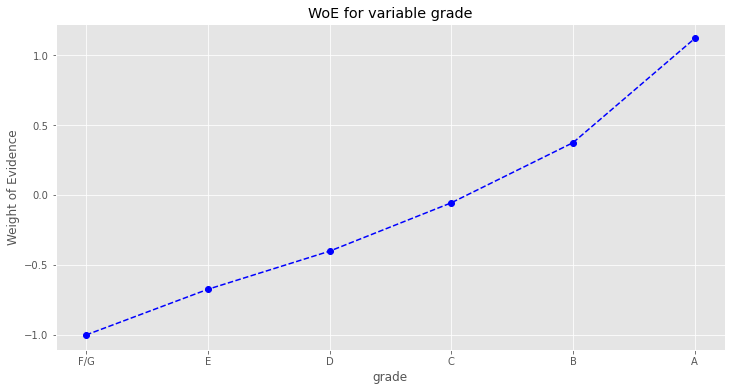

In [37]:
WoE_grade.plot_WoE()

In [38]:
all_WoE['grade'] = WoE_grade
all_aggregators['grade'] = grade_agg

In [39]:
WoE_home = WoE(X=X_train, y=y_train, column_name= 'home_ownership')
WoE_home.table

,home_ownership,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,ANY,0.000000,1,0.5,1.5,0.000003,0.000005,0.000012,-0.999178,NaN,0.022414
3,OTHER,0.222222,144,32.5,112.5,0.000386,0.000339,0.000797,-0.856077,0.483797,0.022414
2,NONE,0.142857,42,6.5,36.5,0.000113,0.000110,0.000159,-0.372280,0.518396,0.022414
5,RENT,0.126453,150783,19067.5,131716.5,0.404214,0.396430,0.467604,-0.165124,0.186151,0.022414
4,OWN,0.107269,33290,3571.5,29719.5,0.089243,0.089447,0.087586,0.021027,0.877105,0.022414
1,MORTGAGE,0.095874,188768,18098.5,170670.5,0.506042,0.513670,0.443841,0.146115,1.145293,0.022414


In [40]:
def home_agg(row):
    if row in ['OTHER', 'NONE', 'MORTGAGE', 'ANY']:
        row = 'OTHER'
    return row

In [41]:
WoE_home = WoE(pd.DataFrame(X_train['home_ownership'].apply(home_agg)), y_train, 'home_ownership')
WoE_home.table

,home_ownership,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
2,RENT,0.126453,150783,19067.5,131716.5,0.404214,0.396431,0.467621,-0.165156,0.186151,0.02184
1,OWN,0.107269,33290,3571.5,29719.5,0.089243,0.089448,0.087589,0.020995,0.123863,0.02184
0,OTHER,0.095981,188955,18136.5,170819.5,0.506544,0.514121,0.444789,0.144858,NaN,0.02184


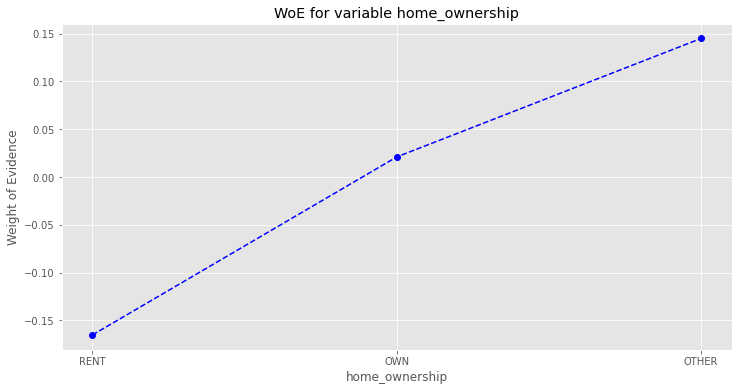

In [42]:
WoE_home.plot_WoE()

In [43]:
all_WoE['home_ownership'] = WoE_home
all_aggregators['home_ownership'] = home_agg

In [44]:
WoE_ver_status = WoE(X_train, y_train, 'verification_status')
WoE_ver_status.table

,verification_status,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
2,Verified,0.127565,134347,17138.5,117209.5,0.360153,0.352769,0.420314,-0.175187,0.228623,0.021374
1,Source Verified,0.104210,120036,12509.5,107527.5,0.321788,0.323629,0.306790,0.053435,0.116985,0.021374
0,Not Verified,0.093784,118645,11127.5,107518.5,0.318059,0.323602,0.272897,0.170421,NaN,0.021374


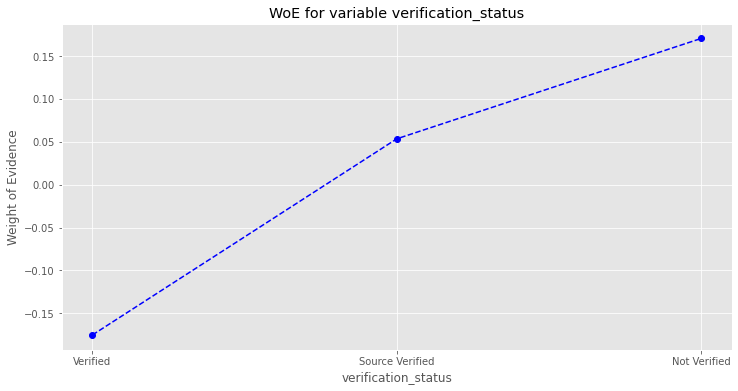

In [45]:
WoE_ver_status.plot_WoE()

In [46]:
all_WoE['verification_status'] = WoE_ver_status

In [47]:
WoE_purpose = WoE(X_train, y_train, 'purpose')
WoE_purpose.table

,purpose,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
11,small_business,0.213914,5577,1193.5,4384.5,0.014951,0.013196,0.029266,-0.796519,0.419478,0.038084
3,educational,0.196078,357,70.5,287.5,0.000957,0.000865,0.001729,-0.692094,0.649159,0.038084
8,moving,0.156418,2423,379.5,2044.5,0.006495,0.006153,0.009306,-0.413651,0.144679,0.038084
10,renewable_energy,0.150538,279,42.5,237.5,0.000748,0.000715,0.001042,-0.377041,0.112216,0.038084
5,house,0.143409,1813,260.5,1553.5,0.004860,0.004676,0.006388,-0.312042,0.438680,0.038084
7,medical,0.138292,3724,515.5,3209.5,0.009983,0.009660,0.012641,-0.268971,0.409023,0.038084
9,other,0.137877,18988,2618.5,16370.5,0.050902,0.049270,0.064209,-0.264825,0.148825,0.038084
12,vacation,0.121029,1983,240.5,1743.5,0.005316,0.005247,0.005897,-0.116775,0.679744,0.038084
13,wedding,0.115778,1857,215.5,1642.5,0.004978,0.004943,0.005284,-0.066691,0.050084,0.038084
2,debt_consolidation,0.113570,219513,24930.5,194583.5,0.588463,0.585634,0.611326,-0.042935,0.317225,0.038084


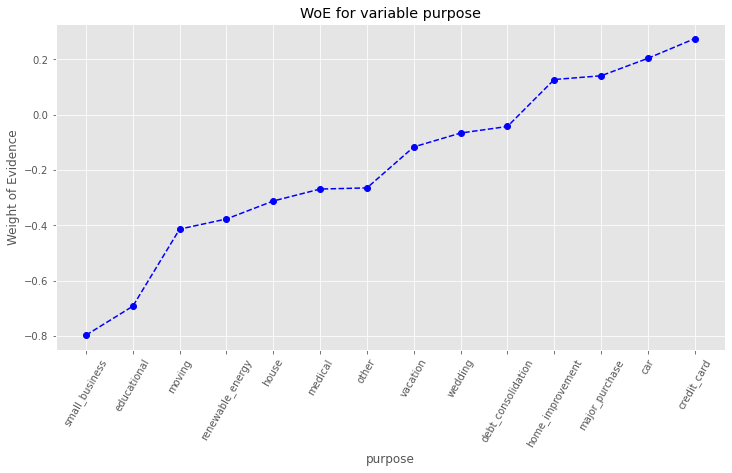

In [48]:
WoE_purpose.plot_WoE(x_rotation=60)

In [49]:
WoE_purpose.table['purpose'].values

array(['small_business', 'educational', 'moving', 'renewable_energy',
       'house', 'medical', 'other', 'vacation', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase', 'car',
       'credit_card'], dtype=object)

In [50]:
def purpose_agg(row):
    if row in ['car', 'credit_card']:
        row = 'car/CC'
    elif row in ['major_purchase', 'home_improvement']:
        row = 'mjr_purch/home_imp'
    elif row in ['small_business', 'educational', 'renewable_energy', 'moving',
       'house', 'other', 'medical', 'vacation', 'wedding']:
        row = 'other'
    return row

In [51]:
WoE_purpose = WoE(pd.DataFrame(X_train['purpose'].apply(purpose_agg)), y_train, 'purpose')
WoE_purpose.table

,purpose,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
3,other,0.149509,37001,5532.5,31469.5,0.099191,0.094715,0.135680,-0.359433,0.489733,0.03254
1,debt_consolidation,0.113570,219513,24930.5,194583.5,0.588463,0.585643,0.611401,-0.043043,0.313737,0.03254
2,mjr_purch/home_imp,0.097240,29062,2826.5,26236.5,0.077908,0.078965,0.069318,0.130300,0.173343,0.03254
0,car/CC,0.085601,87452,7486.5,79966.5,0.234438,0.240677,0.183601,0.270694,NaN,0.03254


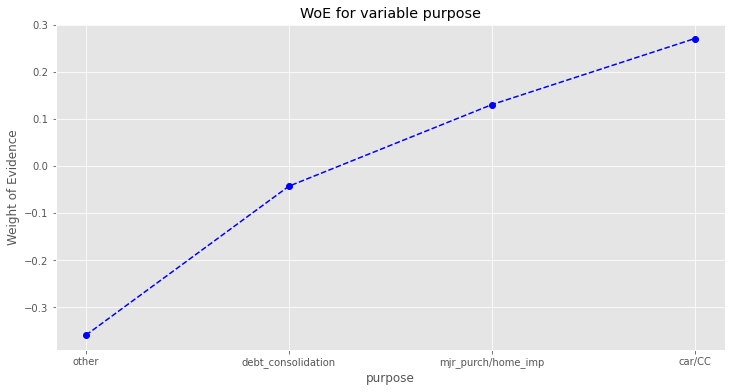

In [52]:
WoE_purpose.plot_WoE()

In [53]:
all_WoE['purpose'] = WoE_purpose
all_aggregators['purpose'] = purpose_agg

In [54]:
WoE_init_list_stat = WoE(X_train, y_train, 'initial_list_status')
WoE_init_list_stat.table

,initial_list_status,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,f,0.120052,242387,29099.5,213288.5,0.649782,0.641942,0.71366,-0.105909,NaN,0.023626
1,w,0.089367,130641,11675.5,118966.5,0.350218,0.358058,0.28634,0.223516,0.329425,0.023626


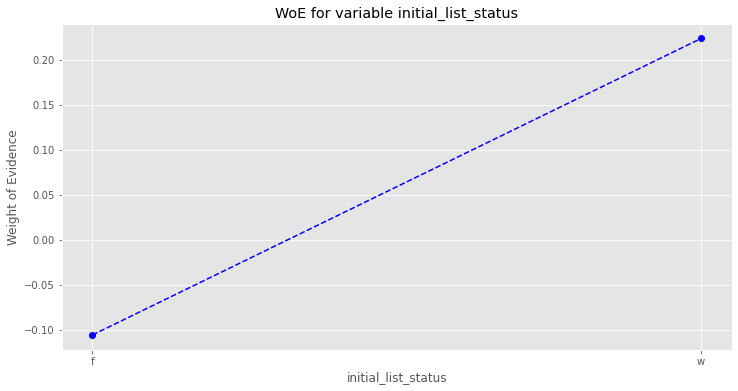

In [55]:
WoE_init_list_stat.plot_WoE()

In [56]:
all_WoE['initial_list_status'] = WoE_init_list_stat

In [57]:
WoE_term_int = WoE(X_train, y_train, 'term_int')
WoE_term_int.table

,term_int,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
1,60,0.142158,102759,14608.5,88151.5,0.275473,0.265313,0.358271,-0.300380,0.435659,0.040498
0,36,0.096815,270269,26166.5,244103.5,0.724527,0.734687,0.641729,0.135279,NaN,0.040498


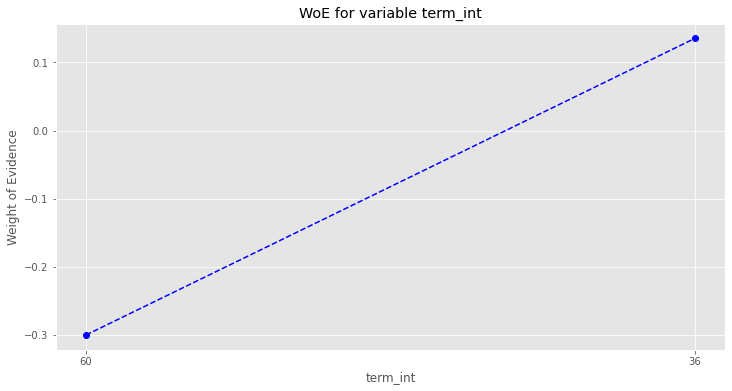

In [58]:
WoE_term_int.plot_WoE()

In [59]:
all_WoE['term_int'] = WoE_term_int

In [60]:
bin_int_rate = bin_data(X_train['int_rate'], n_bins=20)

In [61]:
WoE_int_rate = WoE(X=bin_int_rate.binned_col, y=y_train, column_name='int_rate', sort_by='int_rate', is_binned=True)
WoE_int_rate.table

,int_rate,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,"(5.42, 6.99]",0.025661,18394,472.5,17922.5,0.049310,0.053940,0.011585,1.538145,NaN,0.334518
1,"(6.99, 7.9]",0.040017,23865,955.5,22910.5,0.063976,0.068953,0.023428,1.079487,0.458659,0.334518
2,"(7.9, 8.9]",0.048423,17533,849.5,16684.5,0.047002,0.050215,0.020829,0.879958,0.199528,0.334518
3,"(8.9, 9.91]",0.049869,14498,723.5,13775.5,0.038866,0.041459,0.017740,0.848917,0.031041,0.334518
4,"(9.91, 10.99]",0.066042,28709,1896.5,26813.5,0.076962,0.080699,0.046501,0.551266,0.297651,0.334518
5,"(10.99, 11.49]",0.087963,8640,760.5,7880.5,0.023162,0.023718,0.018647,0.240541,0.310725,0.334518
6,"(11.49, 12.12]",0.079962,25012,2000.5,23012.5,0.067051,0.069260,0.049050,0.345011,0.104470,0.334518
7,"(12.12, 12.49]",0.074307,12556,933.5,11623.5,0.033660,0.034983,0.022889,0.424214,0.079203,0.334518
8,"(12.49, 13.11]",0.098874,24162,2389.5,21773.5,0.064773,0.065531,0.058588,0.111980,0.312234,0.334518
9,"(13.11, 13.66]",0.092921,13689,1272.5,12417.5,0.036697,0.037372,0.031201,0.180494,0.068514,0.334518


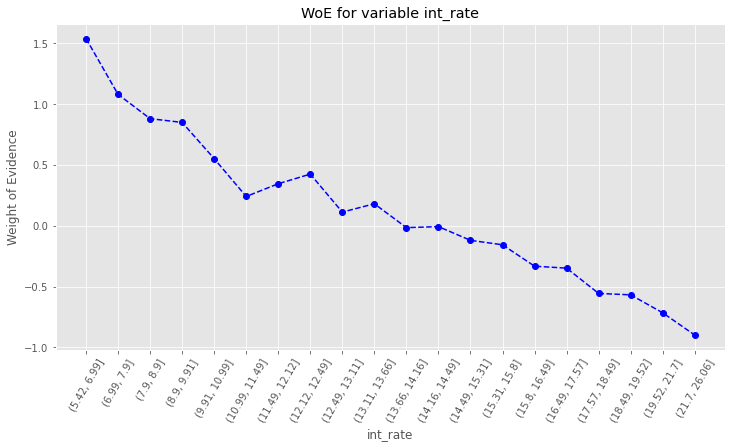

In [62]:
WoE_int_rate.plot_WoE(x_rotation=60)

In [63]:
int_bins = [5.00,  6.99,  7.9 ,  8.9 ,  9.91, 10.99, 12.49, 13.66, 14.49, 15.8, 17.57, 19.52, 21.7 , 30.00]
bin_int_rate = bin_data(X_train['int_rate'], your_bins=int_bins)

In [64]:
all_binners['int_rate'] = bin_int_rate

In [65]:
WoE_int_rate = WoE(bin_int_rate.binned_col, y_train, 'int_rate', sort_by='int_rate', is_binned=True)
WoE_int_rate.table

,int_rate,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,"(5.0, 6.99]",0.025831,18853,487.5,18366.5,0.050540,0.055277,0.011954,1.531278,NaN,0.33396
1,"(6.99, 7.9]",0.040017,23865,955.5,22910.5,0.063976,0.068953,0.023430,1.079401,0.451878,0.33396
2,"(7.9, 8.9]",0.048423,17533,849.5,16684.5,0.047002,0.050215,0.020831,0.879872,0.199528,0.33396
3,"(8.9, 9.91]",0.049869,14498,723.5,13775.5,0.038866,0.041460,0.017741,0.848831,0.031041,0.33396
4,"(9.91, 10.99]",0.066042,28709,1896.5,26813.5,0.076962,0.080700,0.046505,0.551180,0.297651,0.33396
5,"(10.99, 12.49]",0.079921,46208,3693.5,42515.5,0.123873,0.127958,0.090570,0.345579,0.205601,0.33396
6,"(12.49, 13.66]",0.096721,37851,3661.5,34190.5,0.101470,0.102903,0.089786,0.136360,0.209219,0.33396
7,"(13.66, 14.49]",0.110441,36626,4045.5,32581.5,0.098186,0.098060,0.099202,-0.011576,0.147935,0.33396
8,"(14.49, 15.8]",0.123161,39566,4873.5,34693.5,0.106067,0.104417,0.119506,-0.134975,0.123400,0.33396
9,"(15.8, 17.57]",0.147283,40283,5933.5,34350.5,0.107989,0.103384,0.145498,-0.341713,0.206738,0.33396


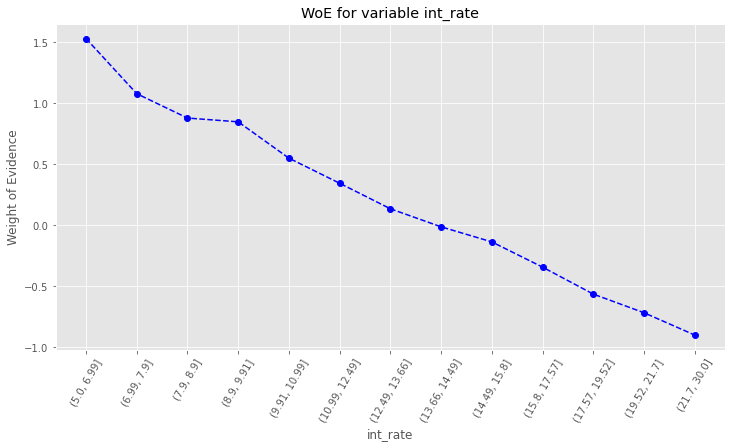

In [66]:
WoE_int_rate.plot_WoE(x_rotation=60)

In [67]:
all_WoE['int_rate'] = WoE_int_rate

In [68]:
bin_dti = bin_data(X_train['dti'])

In [69]:
WoE_dti = WoE(bin_dti.binned_col, y_train, column_name='dti', sort_by='dti', is_binned=True)
WoE_dti.table

,dti,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,"(0.0, 7.03]",0.088245,37056,3270.5,33786.5,0.099338,0.101687,0.080200,0.237382,NaN,0.026374
1,"(7.03, 10.11]",0.089292,37282,3329.5,33953.5,0.099944,0.102190,0.081646,0.224433,0.012949,0.026374
2,"(10.11, 12.54]",0.094544,37295,3526.5,33769.5,0.099979,0.101636,0.086477,0.161515,0.062918,0.026374
3,"(12.54, 14.71]",0.099617,37293,3715.5,33578.5,0.099974,0.101061,0.091112,0.103636,0.057879,0.026374
4,"(14.71, 16.87]",0.103502,37294,3860.5,33434.5,0.099976,0.100628,0.094668,0.061055,0.042581,0.026374
5,"(16.87, 19.08]",0.111982,37381,4186.5,33195.5,0.100210,0.099908,0.102662,-0.027188,0.088242,0.026374
6,"(19.08, 21.46]",0.118367,37350,4421.5,32929.5,0.100127,0.099108,0.108425,-0.089847,0.062659,0.026374
7,"(21.46, 24.22]",0.124819,37278,4653.5,32625.5,0.099934,0.098193,0.114114,-0.150262,0.060415,0.026374
8,"(24.22, 28.01]",0.128760,37271,4799.5,32472.5,0.099915,0.097732,0.117694,-0.185855,0.035593,0.026374
9,"(28.01, 39.99]",0.133401,37226,4966.5,32260.5,0.099794,0.097094,0.121789,-0.226609,0.040754,0.026374


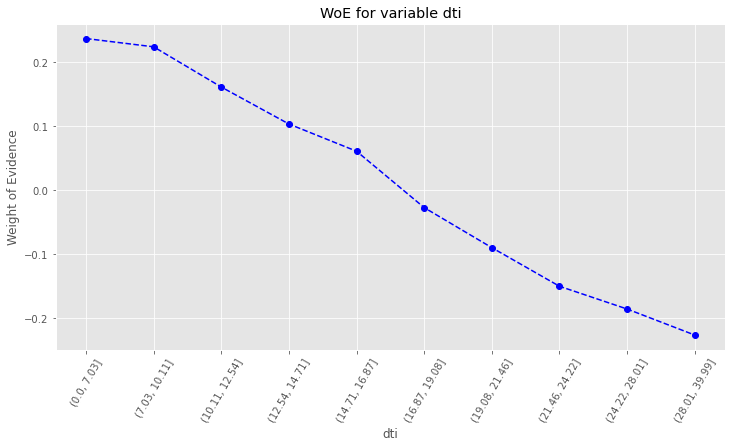

In [70]:
WoE_dti.plot_WoE(x_rotation=60)

In [71]:
bin_dti.bins

array([ 0.  ,  7.03, 10.11, 12.54, 14.71, 16.87, 19.08, 21.46, 24.22,
       28.01, 39.99])

In [72]:
dti_bins = [-0.01, 10.11, 12.54, 14.72, 16.87, 19.08, 21.46, 24.22, 28., 10000.0]

In [73]:
bin_dti = bin_data(X_train['dti'], your_bins=dti_bins)
all_binners['dti'] = bin_dti

In [74]:
WoE_dti = WoE(bin_dti.binned_col, y_train, 'dti', sort_by='dti', is_binned=True)
WoE_dti.table

,dti,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,"(-0.01, 10.11]",0.089068,74640,6648.5,67992.5,0.200092,0.204637,0.163039,0.227248,NaN,0.025911
1,"(10.11, 12.54]",0.094544,37295,3526.5,33769.5,0.099979,0.101636,0.086479,0.161494,0.065754,0.025911
2,"(12.54, 14.72]",0.099573,37440,3728.5,33712.5,0.100368,0.101465,0.091433,0.104104,0.057389,0.025911
3,"(14.72, 16.87]",0.103562,37147,3847.5,33300.5,0.099582,0.100225,0.094351,0.060391,0.043714,0.025911
4,"(16.87, 19.08]",0.111982,37381,4186.5,33195.5,0.100210,0.099909,0.102664,-0.027209,0.087600,0.025911
5,"(19.08, 21.46]",0.118367,37350,4421.5,32929.5,0.100127,0.099108,0.108427,-0.089868,0.062659,0.025911
6,"(21.46, 24.22]",0.124819,37278,4653.5,32625.5,0.099934,0.098193,0.114117,-0.150284,0.060415,0.025911
7,"(24.22, 28.0]",0.128791,37192,4790.5,32402.5,0.099703,0.097522,0.117476,-0.186158,0.035874,0.025911
8,"(28.0, 10000.0]",0.133360,37305,4975.5,32330.5,0.100006,0.097305,0.122013,-0.226273,0.040116,0.025911


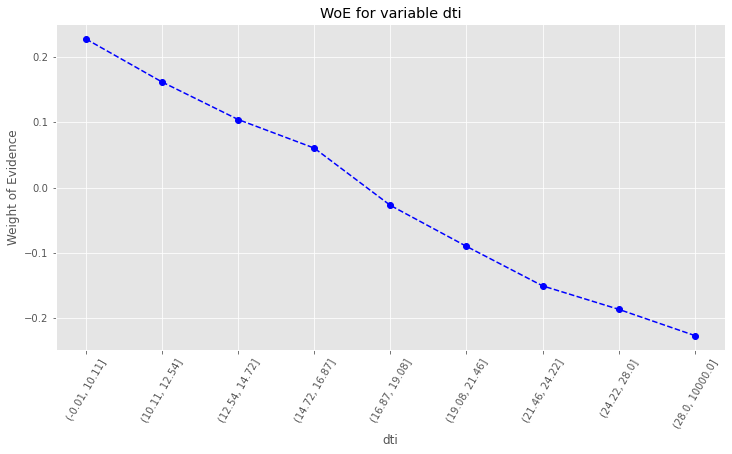

In [75]:
WoE_dti.plot_WoE(x_rotation=60)

In [76]:
all_WoE['dti'] = WoE_dti

In [77]:
WoE_inq_6ms = WoE(X_train, y_train, 'inq_last_6mths', sort_by='inq_last_6mths')
WoE_inq_6ms.table

,inq_last_6mths,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,0.0,0.091642,193122,17698.5,175424.5,0.517714,0.527962,0.433925,0.196153,NaN,0.051138
1,1.0,0.115575,104227,12046.5,92181.5,0.279408,0.277432,0.295351,-0.062590,0.258744,0.051138
2,2.0,0.134896,46258,6240.5,40018.5,0.124007,0.120441,0.153002,-0.239294,0.176704,0.051138
3,3.0,0.157861,20081,3170.5,16911.5,0.053832,0.050897,0.077733,-0.423471,0.184177,0.051138
4,4.0,0.153687,5791,890.5,4901.5,0.015524,0.014752,0.021833,-0.392062,0.031409,0.051138
5,5.0,0.174696,2221,388.5,1833.5,0.005954,0.005518,0.009525,-0.545887,0.153825,0.051138
6,6.0,0.218783,937,205.5,732.5,0.002512,0.002205,0.005038,-0.826558,0.280672,0.051138
7,7.0,0.354839,155,55.5,100.5,0.000416,0.000302,0.001361,-1.503801,0.677243,0.051138
8,8.0,0.390000,100,39.5,61.5,0.000268,0.000185,0.000968,-1.654839,0.151038,0.051138
9,9.0,0.368421,38,14.5,24.5,0.000102,0.000074,0.000356,-1.573051,0.081788,0.051138


In [78]:
def inq_6ms_agg(row):
    if row > 2 and row < 5:
        row = '3-4'
    elif row > 4:
        row = '> 4'
    return row

In [79]:
WoE_inq_6ms = WoE(pd.DataFrame(X_train['inq_last_6mths'].apply(inq_6ms_agg)), y_train, 'inq_last_6mths', sort_by='WoE')
WoE_inq_6ms.table

,inq_last_6mths,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
4,> 4,0.206408,3527,728.5,2799.5,0.009455,0.008426,0.017865,-0.751582,0.334969,0.048574
3,3-4,0.156926,25872,4060.5,21812.5,0.069357,0.065649,0.099578,-0.416613,0.177104,0.048574
2,2.0,0.134896,46258,6240.5,40018.5,0.124007,0.120444,0.153040,-0.239509,0.176704,0.048574
1,1.0,0.115575,104227,12046.5,92181.5,0.279408,0.277440,0.295424,-0.062805,0.258744,0.048574
5,nan,0.090909,22,2.5,20.5,0.000059,0.000062,0.000061,0.006344,0.757926,0.048574
0,0.0,0.091642,193122,17698.5,175424.5,0.517714,0.527978,0.434031,0.195938,NaN,0.048574


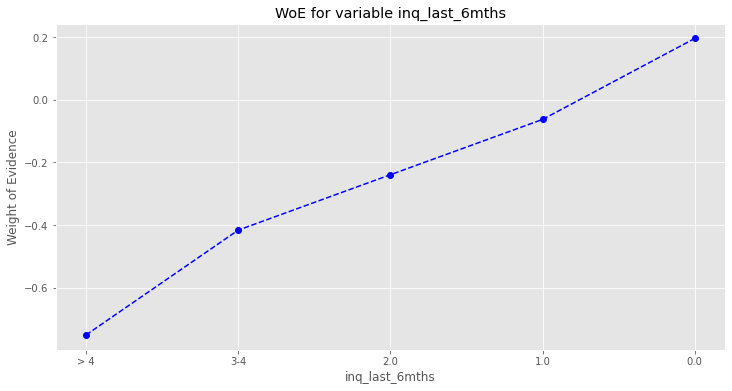

In [80]:
WoE_inq_6ms.plot_WoE()

In [81]:
all_WoE['inq_last_6mths'] = WoE_inq_6ms
all_aggregators['inq_last_6mths'] = inq_6ms_agg

In [82]:
bin_annual_inc = bin_data(X_train['annual_inc'])
bin_annual_inc.bins

array([1.896000e+03, 3.400000e+04, 4.160000e+04, 4.900000e+04,
       5.500000e+04, 6.284900e+04, 7.100000e+04, 8.100000e+04,
       9.600000e+04, 1.200000e+05, 7.446395e+06])

In [83]:
bin_annual_inc = bin_data(X_train['annual_inc'])
WoE_annual_inc = WoE(bin_annual_inc.binned_col, y_train, 'annual_inc', sort_by='annual_inc', is_binned=True)
WoE_annual_inc.table

,annual_inc,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,"(1896.0, 34000.0]",0.145589,38856,5657.5,33199.5,0.104164,0.099920,0.138734,-0.328184,NaN,0.05333
1,"(34000.0, 41600.0]",0.135343,35931,4863.5,31068.5,0.096323,0.093507,0.119263,-0.243301,0.084883,0.05333
2,"(41600.0, 49000.0]",0.125877,37648,4739.5,32909.5,0.100925,0.099048,0.116223,-0.159907,0.083394,0.05333
3,"(49000.0, 55000.0]",0.116901,39478,4615.5,34863.5,0.105831,0.104929,0.113182,-0.075717,0.084191,0.05333
4,"(55000.0, 62849.0]",0.117724,34598,4073.5,30525.5,0.092749,0.091872,0.099891,-0.083677,0.007960,0.05333
5,"(62849.0, 71000.0]",0.106853,38015,4062.5,33953.5,0.101909,0.102190,0.099621,0.025457,0.109134,0.05333
6,"(71000.0, 81000.0]",0.098753,37214,3675.5,33539.5,0.099762,0.100944,0.090131,0.113298,0.087841,0.05333
7,"(81000.0, 96000.0]",0.088459,38074,3368.5,34706.5,0.102067,0.104456,0.082603,0.234723,0.121425,0.05333
8,"(96000.0, 120000.0]",0.082492,37458,3090.5,34368.5,0.100416,0.103439,0.075786,0.311071,0.076348,0.05333
9,"(120000.0, 7446395.0]",0.073620,35751,2632.5,33119.5,0.095840,0.099680,0.064554,0.434451,0.123381,0.05333


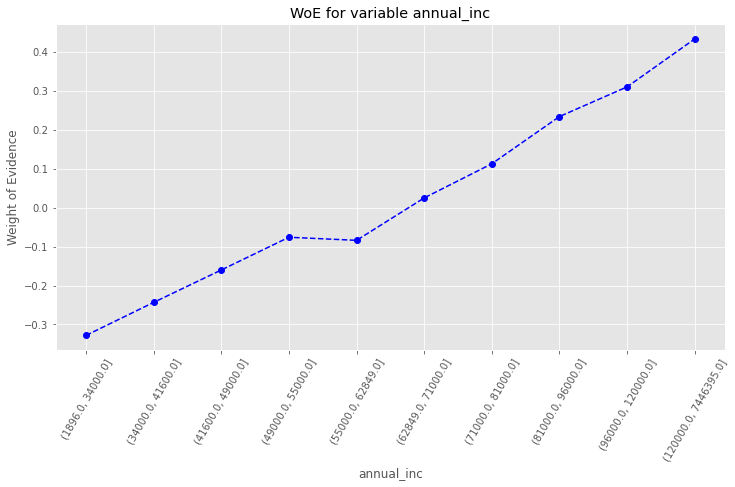

In [84]:
WoE_annual_inc.plot_WoE(x_rotation=60)

In [85]:
bin_annual_inc.bins

array([1.896000e+03, 3.400000e+04, 4.160000e+04, 4.900000e+04,
       5.500000e+04, 6.284900e+04, 7.100000e+04, 8.100000e+04,
       9.600000e+04, 1.200000e+05, 7.446395e+06])

In [86]:
bins_inc = [-0.01, 34000.0, 41600.0, 49000.0, 62849.0, 71000.0, 81000.0, 96000.0, 120000.0, 10000000.0]
bins_inc

[-0.01,
 34000.0,
 41600.0,
 49000.0,
 62849.0,
 71000.0,
 81000.0,
 96000.0,
 120000.0,
 10000000.0]

In [87]:
bin_annual_inc = bin_data(X_train['annual_inc'], your_bins=bins_inc)

In [88]:
WoE_annual_inc = WoE(bin_annual_inc.binned_col, y_train, 'annual_inc', sort_by='annual_inc', is_binned=True)
WoE_annual_inc.table

,annual_inc,prop_good,n_obs,n_bad,n_good,prop_n_obs,prop_n_good,prop_n_bad,WoE,WoE diff,IV
0,"(-0.01, 34000.0]",0.145585,38857,5657.5,33200.5,0.104166,0.099924,0.138736,-0.328165,NaN,0.053322
1,"(34000.0, 41600.0]",0.135343,35931,4863.5,31068.5,0.096323,0.093507,0.119265,-0.243311,0.084853,0.053322
2,"(41600.0, 49000.0]",0.125877,37648,4739.5,32909.5,0.100925,0.099048,0.116224,-0.159918,0.083394,0.053322
3,"(49000.0, 62849.0]",0.117285,74076,8688.5,65388.5,0.198580,0.196800,0.213063,-0.079401,0.080516,0.053322
4,"(62849.0, 71000.0]",0.106853,38015,4062.5,33953.5,0.101909,0.102190,0.099622,0.025446,0.104847,0.053322
5,"(71000.0, 81000.0]",0.098753,37214,3675.5,33539.5,0.099762,0.100944,0.090132,0.113287,0.087841,0.053322
6,"(81000.0, 96000.0]",0.088459,38074,3368.5,34706.5,0.102067,0.104456,0.082604,0.234712,0.121425,0.053322
7,"(96000.0, 120000.0]",0.082492,37458,3090.5,34368.5,0.100416,0.103439,0.075787,0.311060,0.076348,0.053322
8,"(120000.0, 10000000.0]",0.073620,35751,2632.5,33119.5,0.095840,0.099680,0.064555,0.434441,0.123381,0.053322
0,nan,0.000000,4,0.5,4.5,0.000011,0.000014,0.000012,0.099477,0.334964,0.053322


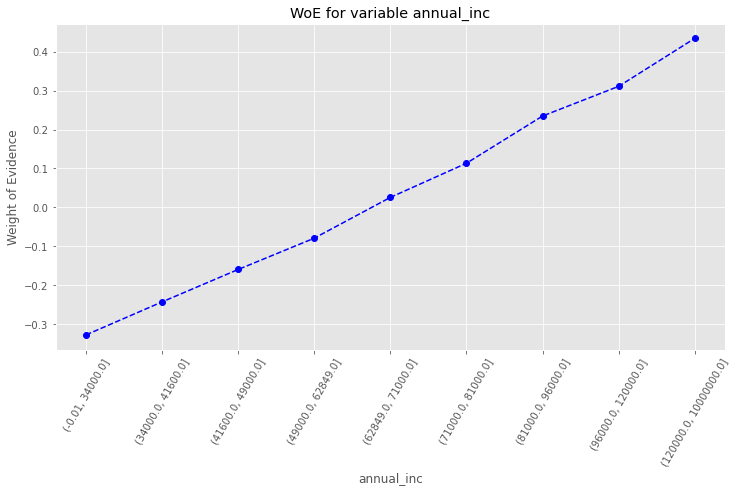

In [89]:
WoE_annual_inc.plot_WoE(x_rotation=60)

In [90]:
all_binners['annual_inc'] = bin_annual_inc

In [91]:
all_WoE['annual_inc'] = WoE_annual_inc

In [92]:
all_WoE

{'grade': <__main__.WoE at 0x1fd815b8dc0>,
 'home_ownership': <__main__.WoE at 0x1fd8158c3d0>,
 'verification_status': <__main__.WoE at 0x1fd8eed7190>,
 'purpose': <__main__.WoE at 0x1fd8ee6cc40>,
 'initial_list_status': <__main__.WoE at 0x1fd8f22ec10>,
 'term_int': <__main__.WoE at 0x1fd8f238670>,
 'int_rate': <__main__.WoE at 0x1fd8fa232b0>,
 'dti': <__main__.WoE at 0x1fd8fb88af0>,
 'inq_last_6mths': <__main__.WoE at 0x1fd8f366820>,
 'annual_inc': <__main__.WoE at 0x1fd8f21b0a0>}

In [93]:
all_binners

{'int_rate': <__main__.bin_data at 0x1fd8f36c2e0>,
 'dti': <__main__.bin_data at 0x1fd8fb88550>,
 'annual_inc': <__main__.bin_data at 0x1fd8f26c5b0>}

In [94]:
all_aggregators

{'grade': <function __main__.grade_agg(row)>,
 'home_ownership': <function __main__.home_agg(row)>,
 'purpose': <function __main__.purpose_agg(row)>,
 'inq_last_6mths': <function __main__.inq_6ms_agg(row)>}

In [95]:
X_train.head()

,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term_int
106734,6.03,A,MORTGAGE,85000.0,Verified,debt_consolidation,8.26,0.0,w,36
183573,22.47,E,MORTGAGE,110000.0,Verified,debt_consolidation,19.17,3.0,w,60
52853,8.90,A,MORTGAGE,110700.0,Not Verified,debt_consolidation,19.02,0.0,w,36
399347,14.16,C,OWN,53110.0,Verified,credit_card,34.21,0.0,w,36
143199,14.33,C,RENT,30000.0,Verified,debt_consolidation,13.64,0.0,f,36


# Preparation of training and test data for PD model development

### Aggregation

In [96]:
for column in all_aggregators.keys():
    X_train[column] = X_train[column].apply(all_aggregators[column])
    X_test[column] = X_test[column].apply(all_aggregators[column])

### Binning

In [97]:
for column in all_binners.keys():
    X_train[column] = all_binners[column].transform(X_train[column])
    X_test[column] = all_binners[column].transform(X_test[column])

In [98]:
# aggregated and binned data are copied to test scorecard prepared in the later stage
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

### WoE transformation

In [99]:
for column in all_WoE.keys():
    X_train[column] = all_WoE[column].transform(X_train[column])
    X_test[column] = all_WoE[column].transform(X_test[column])

# IV summary

In [100]:
var_names = []
IVs = []
for column in all_WoE.keys():
    var_names.append(column)
    IVs.append(all_WoE[column].IV)

In [101]:
pd.DataFrame({'Variable': var_names, 'IV': IVs}).sort_values('IV', ascending=False)

,Variable,IV
6,int_rate,0.333960
0,grade,0.294593
9,annual_inc,0.053322
8,inq_last_6mths,0.048574
5,term_int,0.040498
3,purpose,0.032540
7,dti,0.025911
4,initial_list_status,0.023626
1,home_ownership,0.021840
2,verification_status,0.021374


In [102]:
X_train

,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term_int
106734,1.531278,1.118742,0.144858,0.234712,-0.175187,-0.043043,0.227248,0.195938,0.223516,0.135279
183573,-0.898328,-0.675055,0.144858,0.311060,-0.175187,-0.043043,-0.089868,-0.416613,0.223516,-0.300380
52853,0.879872,1.118742,0.144858,0.311060,0.170421,-0.043043,-0.027209,0.195938,0.223516,0.135279
399347,-0.011576,-0.056427,0.020995,-0.079401,-0.175187,0.270694,-0.226273,0.195938,0.223516,0.135279
143199,-0.011576,-0.056427,-0.165156,-0.328165,-0.175187,-0.043043,0.104104,0.195938,-0.105909,0.135279
...,...,...,...,...,...,...,...,...,...,...
161308,0.345579,0.373575,0.144858,-0.079401,0.053435,-0.043043,0.161494,0.195938,0.223516,0.135279
91023,0.345579,0.373575,-0.165156,-0.328165,0.170421,-0.043043,-0.186158,-0.062805,-0.105909,0.135279
226515,0.136360,0.373575,-0.165156,0.234712,0.053435,-0.359433,0.227248,-0.062805,-0.105909,0.135279
24625,1.531278,1.118742,-0.165156,-0.243311,0.053435,-0.043043,-0.027209,0.195938,-0.105909,0.135279


# Model training and validation

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression(random_state=1)

In [105]:
lr = lr.fit(X_train, y_train)

In [106]:
y_train_pred = lr.predict(X_train)

In [107]:
y_train_proba = lr.predict_proba(X_train)

In [108]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [109]:
con_mat_train = confusion_matrix(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba[:, 1])
auc_train = roc_auc_score(y_train, y_train_proba[:, 1])

In [110]:
con_mat_train

array([[332254,      0],
       [ 40774,      0]], dtype=int64)

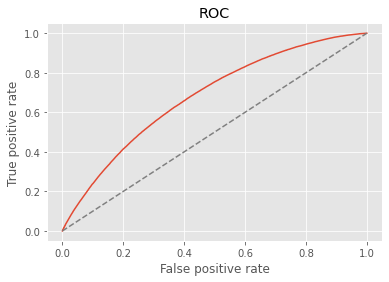

In [111]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', c='grey')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.show()

In [112]:
print(auc_train)

0.6790213195833578


In [113]:
cum_probs = pd.DataFrame({'y_train_proba': y_train_proba[:, 1],
                         'y_train' : y_train.values})
cum_probs = cum_probs.sort_values('y_train_proba', ascending=False)
cum_probs.reset_index(drop=True, inplace=True)
cum_probs['Cumulative n'] = cum_probs.index + 1
cum_probs['Cumulative bad'] = cum_probs['y_train'].cumsum()
cum_probs['Cumulative good'] = cum_probs['Cumulative n'] - cum_probs['Cumulative bad']
cum_probs['Cumulative n %'] = cum_probs['Cumulative n']/cum_probs.shape[0]
cum_probs['Cumulative bad %'] = cum_probs['Cumulative bad']/cum_probs['y_train'].sum()
cum_probs['Cumulative good %'] = cum_probs['Cumulative good']/(cum_probs.shape[0] - cum_probs['y_train'].sum())
cum_probs

,y_train_proba,y_train,Cumulative n,Cumulative bad,Cumulative good,Cumulative n %,Cumulative bad %,Cumulative good %
0,0.463354,0,1,0,1,0.000003,0.000000,0.000003
1,0.434217,1,2,1,1,0.000005,0.000025,0.000003
2,0.428333,0,3,1,2,0.000008,0.000025,0.000006
3,0.427190,1,4,2,2,0.000011,0.000049,0.000006
4,0.417322,1,5,3,2,0.000013,0.000074,0.000006
...,...,...,...,...,...,...,...,...
373023,0.011561,0,373024,40774,332250,0.999989,1.000000,0.999988
373024,0.011561,0,373025,40774,332251,0.999992,1.000000,0.999991
373025,0.011561,0,373026,40774,332252,0.999995,1.000000,0.999994
373026,0.011561,0,373027,40774,332253,0.999997,1.000000,0.999997


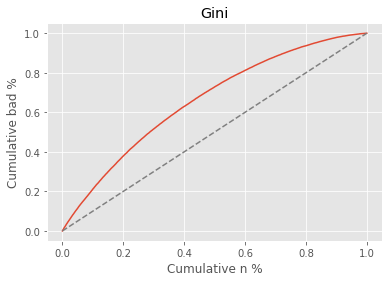

In [114]:
plt.plot(cum_probs['Cumulative n %'], cum_probs['Cumulative bad %'])
plt.plot(cum_probs['Cumulative n %'], cum_probs['Cumulative n %'], linestyle='--', c='grey')
plt.xlabel('Cumulative n %')
plt.ylabel('Cumulative bad %')
plt.title('Gini')
plt.show()

In [115]:
Gini_train = 2*auc_train-1
print(Gini_train)

0.3580426391667155


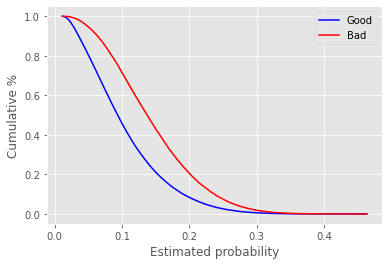

In [116]:
plt.plot(cum_probs['y_train_proba'], cum_probs['Cumulative good %'], label='Good', c='blue')
plt.plot(cum_probs['y_train_proba'], cum_probs['Cumulative bad %'], label='Bad', c='red')
plt.xlabel('Estimated probability')
plt.ylabel('Cumulative %')
plt.legend()
plt.show()

In [117]:
KS_train = np.max(np.abs(cum_probs['Cumulative good %'] - cum_probs['Cumulative bad %']))
KS_train

0.25957308906869275

In [118]:
y_test_proba = lr.predict_proba(X_test)
y_test_pred = lr.predict(X_test)

In [119]:
con_mat_test = confusion_matrix(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])
auc_test = roc_auc_score(y_test, y_test_proba[:, 1])
con_mat_test

array([[83063,     0],
       [10194,     0]], dtype=int64)

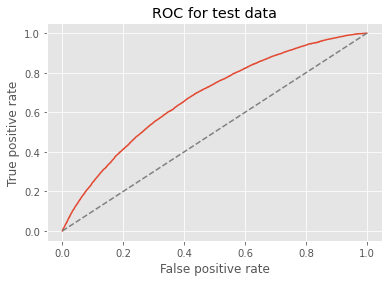

In [120]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', c='grey')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC for test data')
plt.show()

In [121]:
auc_test

0.6767557989902646

In [122]:
cum_probs = pd.DataFrame({'y_test_proba': y_test_proba[:, 1],
                         'y_test' : y_test.values})
cum_probs = cum_probs.sort_values('y_test_proba', ascending=False)
cum_probs.reset_index(drop=True, inplace=True)
cum_probs['Cumulative n'] = cum_probs.index + 1
cum_probs['Cumulative bad'] = cum_probs['y_test'].cumsum()
cum_probs['Cumulative good'] = cum_probs['Cumulative n'] - cum_probs['Cumulative bad']
cum_probs['Cumulative n %'] = cum_probs['Cumulative n']/cum_probs.shape[0]
cum_probs['Cumulative bad %'] = cum_probs['Cumulative bad']/cum_probs['y_test'].sum()
cum_probs['Cumulative good %'] = cum_probs['Cumulative good']/(cum_probs.shape[0] - cum_probs['y_test'].sum())
cum_probs

,y_test_proba,y_test,Cumulative n,Cumulative bad,Cumulative good,Cumulative n %,Cumulative bad %,Cumulative good %
0,0.407584,1,1,1,0,0.000011,0.000098,0.000000
1,0.403008,0,2,1,1,0.000021,0.000098,0.000012
2,0.402471,1,3,2,1,0.000032,0.000196,0.000012
3,0.399635,1,4,3,1,0.000043,0.000294,0.000012
4,0.392676,1,5,4,1,0.000054,0.000392,0.000012
...,...,...,...,...,...,...,...,...
93252,0.011561,0,93253,10194,83059,0.999957,1.000000,0.999952
93253,0.011561,0,93254,10194,83060,0.999968,1.000000,0.999964
93254,0.011561,0,93255,10194,83061,0.999979,1.000000,0.999976
93255,0.011561,0,93256,10194,83062,0.999989,1.000000,0.999988


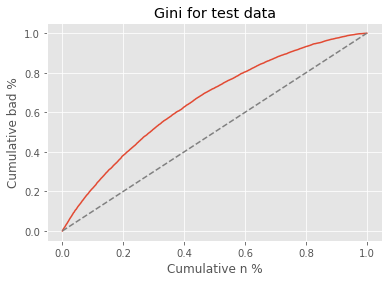

In [123]:
plt.plot(cum_probs['Cumulative n %'], cum_probs['Cumulative bad %'])
plt.plot(cum_probs['Cumulative n %'], cum_probs['Cumulative n %'], linestyle='--', c='grey')
plt.xlabel('Cumulative n %')
plt.ylabel('Cumulative bad %')
plt.title('Gini for test data')
plt.show()

In [124]:
Gini_test = 2*auc_test-1
print(Gini_test)

0.3535115979805292


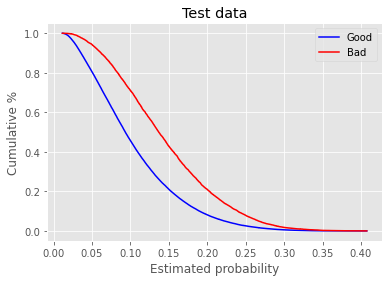

In [125]:
plt.plot(cum_probs['y_test_proba'], cum_probs['Cumulative good %'], label='Good', c='blue')
plt.plot(cum_probs['y_test_proba'], cum_probs['Cumulative bad %'], label='Bad', c='red')
plt.xlabel('Estimated probability')
plt.ylabel('Cumulative %')
plt.title('Test data')
plt.legend()
plt.show()

In [126]:
KS_test = np.max(np.abs(cum_probs['Cumulative good %'] - cum_probs['Cumulative bad %']))
KS_test

0.2585431896811928

# Scorecard development

In [127]:
df_scorecard = pd.DataFrame()
for (col, idx) in zip(X_train.columns, range(len(X_train.columns))):
    df = pd.DataFrame({'Feature': col, 'Value': all_WoE[col].value_to_WoE.keys(), 'WoE': all_WoE[col].value_to_WoE.values(),
                      'Coef': lr.coef_[0][idx]})
    df_scorecard = pd.concat([df_scorecard, df])
df_intercept = pd.DataFrame({'Feature': 'intercept', 'Value': 1, 'WoE': 1, 'Coef': lr.intercept_})
df_scorecard = pd.concat([df_scorecard, df_intercept])
df_scorecard['WoE*Coef'] = df_scorecard['WoE']*df_scorecard['Coef']

In [128]:
df_scorecard

,Feature,Value,WoE,Coef,WoE*Coef
0,int_rate,"(5.0, 6.99]",1.531278,-0.836895,-1.281518
1,int_rate,"(6.99, 7.9]",1.079401,-0.836895,-0.903345
2,int_rate,"(7.9, 8.9]",0.879872,-0.836895,-0.736360
3,int_rate,"(8.9, 9.91]",0.848831,-0.836895,-0.710382
4,int_rate,"(9.91, 10.99]",0.551180,-0.836895,-0.461280
5,int_rate,"(10.99, 12.49]",0.345579,-0.836895,-0.289213
6,int_rate,"(12.49, 13.66]",0.136360,-0.836895,-0.114119
7,int_rate,"(13.66, 14.49]",-0.011576,-0.836895,0.009688
8,int_rate,"(14.49, 15.8]",-0.134975,-0.836895,0.112960
9,int_rate,"(15.8, 17.57]",-0.341713,-0.836895,0.285978


Let's apply scaling so that:
- Score = 300 at odds 1:50
- Odds halve every 50 score points

In [129]:
factor = 50/np.log(1/2) # odds halve every 50 score points
offset = 300 - factor * np.log(1/50) # score = 300 at odds 1:50
print(factor)
print(offset)

-72.13475204444818
17.80719051126374


In [130]:
df_scorecard['Score'] = round((df_scorecard['WoE*Coef'] + lr.intercept_/10)*factor + offset/10)
# (df_scorecard['WoE*Coef'] + lr.intercept_/10) = log odds from model for a single variable (intercept included in a variable 
# and doesn't exist itself)
# score = log odds from model * factor + offset
# 10 = n = number of variables
# when scores for all variables for a given customer are summed, it is equal to log odds from model*factor + offset

In [131]:
df_scorecard = df_scorecard[df_scorecard['Feature'] != 'intercept']
df_scorecard

,Feature,Value,WoE,Coef,WoE*Coef,Score
0,int_rate,"(5.0, 6.99]",1.531278,-0.836895,-1.281518,109.0
1,int_rate,"(6.99, 7.9]",1.079401,-0.836895,-0.903345,82.0
2,int_rate,"(7.9, 8.9]",0.879872,-0.836895,-0.736360,70.0
3,int_rate,"(8.9, 9.91]",0.848831,-0.836895,-0.710382,68.0
4,int_rate,"(9.91, 10.99]",0.551180,-0.836895,-0.461280,50.0
5,int_rate,"(10.99, 12.49]",0.345579,-0.836895,-0.289213,38.0
6,int_rate,"(12.49, 13.66]",0.136360,-0.836895,-0.114119,25.0
7,int_rate,"(13.66, 14.49]",-0.011576,-0.836895,0.009688,16.0
8,int_rate,"(14.49, 15.8]",-0.134975,-0.836895,0.112960,9.0
9,int_rate,"(15.8, 17.57]",-0.341713,-0.836895,0.285978,-4.0


In [132]:
min_score = df_scorecard.groupby('Feature')['Score'].min().sum()
min_score

22.0

In [133]:
max_log_odds = (min_score-offset)/factor # we reverse equation for score to come at sum of log odds from the model for all variables
max_log_odds

-0.058124681514850465

In [134]:
max_odds = np.exp(max_log_odds)
max_odds

0.9435322990663044

In [135]:
max_pd = 1/(1+np.exp(-max_log_odds))
max_pd

0.48547291934360354

In [136]:
max_score = df_scorecard.groupby('Feature')['Score'].max().sum()
max_score

340.0

In [137]:
min_log_ods = (max_score-offset)/factor
min_log_ods

-4.466540749876102

In [138]:
min_pd = 1/(1+np.exp(-min_log_ods))
min_pd

0.011356531262177005

In [139]:
# let's check if odds halve every 50 score points:
min_score_50 = min_score + 50
log_odds = (min_score_50-offset)/factor # we reverse equation for score to come at sum of log odds from the model for all variables
odds = np.exp(log_odds)
print(max_odds) # odds for min_score
print(odds) # odds for min_score + 50 score points

0.9435322990663044
0.47176614953315227


In [140]:
# Function for assigning scores to customers
def pred_scores(X):
    df_X = X.copy()
    for col in df_X.columns:
        df = df_scorecard[df_scorecard['Feature']==col]
        map_to_score = dict(list(zip(df['Value'], df['Score'])))
        df_X[col] = df_X[col].astype('str').map(map_to_score)
    df_X['Score'] = df_X.sum(axis=1)
    return df_X

In [141]:
pred_scores(X_train_raw) # we provide aggregated and binned data, but not after WoE transformation

,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term_int,Score
106734,109.0,18.0,23.0,31.0,13.0,16.0,23.0,26.0,32.0,19.0,310.0
183573,-37.0,16.0,23.0,36.0,13.0,16.0,14.0,-1.0,32.0,12.0,124.0
52853,70.0,18.0,23.0,36.0,21.0,16.0,16.0,26.0,32.0,19.0,277.0
399347,16.0,17.0,18.0,12.0,13.0,25.0,11.0,26.0,32.0,19.0,189.0
143199,16.0,17.0,10.0,-3.0,13.0,16.0,20.0,26.0,10.0,19.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...
161308,38.0,17.0,23.0,12.0,18.0,16.0,21.0,26.0,32.0,19.0,222.0
91023,38.0,17.0,10.0,-3.0,21.0,16.0,12.0,14.0,10.0,19.0,154.0
226515,25.0,17.0,10.0,31.0,18.0,6.0,23.0,14.0,10.0,19.0,173.0
24625,109.0,18.0,10.0,2.0,18.0,16.0,16.0,26.0,10.0,19.0,244.0


In [142]:
pred_scores(X_test_raw)

,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term_int,Score
159089,-37.0,16.0,10.0,12.0,13.0,25.0,20.0,26.0,10.0,12.0,107.0
204026,16.0,17.0,10.0,36.0,13.0,16.0,14.0,26.0,10.0,19.0,177.0
446918,68.0,17.0,18.0,12.0,18.0,16.0,12.0,26.0,10.0,19.0,216.0
309480,109.0,18.0,10.0,44.0,21.0,16.0,20.0,26.0,32.0,19.0,315.0
427185,-4.0,17.0,18.0,2.0,21.0,16.0,13.0,6.0,32.0,19.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...
262014,70.0,17.0,18.0,44.0,13.0,25.0,20.0,6.0,32.0,19.0,264.0
363939,38.0,17.0,10.0,18.0,18.0,16.0,11.0,26.0,32.0,12.0,198.0
110909,109.0,18.0,23.0,2.0,21.0,16.0,12.0,14.0,32.0,19.0,266.0
82810,16.0,17.0,23.0,36.0,13.0,16.0,19.0,26.0,10.0,19.0,195.0


### PD/Score cut-off inference

In [143]:
def n_approved(p):
    # returns number of approved customers given PD cut-off = p 
    return np.sum(np.where(y_test_proba[:, 1] < p, 1, 0))

In [144]:
df_appr = pd.DataFrame({'pd': thresholds, 'tpr': tpr, 'fpr': fpr})
df_appr.iloc[0,0] = 0.9999
df_appr['logodds'] = np.log(df_appr['pd']/(1-df_appr['pd']))
df_appr['score'] = df_appr['logodds']*factor + offset
df_appr.iloc[0, 4] = 0
df_appr['Approved'] = df_appr['pd'].apply(n_approved)
df_appr['Rejected'] = y_test_proba.shape[0] - df_appr['Approved']
df_appr['Approval Rate'] = df_appr['Approved'] / y_test_proba.shape[0]
df_appr['Rejection Rate'] = 1 - df_appr['Approval Rate']

In [145]:
pd.options.display.max_rows = None
df_appr.iloc[25000:30000, ]

,pd,tpr,fpr,logodds,score,Approved,Rejected,Approval Rate,Rejection Rate
25000,0.066572,0.881891,0.687587,-2.640573,208.284254,27154,66103,0.291174,0.708826
25001,0.066567,0.881989,0.687599,-2.640667,208.291032,27152,66105,0.291152,0.708848
25002,0.066553,0.881989,0.687635,-2.640881,208.306492,27149,66108,0.291120,0.708880
25003,0.066547,0.881989,0.687659,-2.640980,208.313641,27147,66110,0.291099,0.708901
25004,0.066536,0.881989,0.687683,-2.641153,208.326117,27145,66112,0.291077,0.708923
25005,0.066535,0.881989,0.687707,-2.641170,208.327353,27143,66114,0.291056,0.708944
25006,0.066532,0.881989,0.687731,-2.641230,208.331641,27141,66116,0.291034,0.708966
25007,0.066531,0.881989,0.687755,-2.641238,208.332257,27139,66118,0.291013,0.708987
25008,0.066527,0.882088,0.687755,-2.641297,208.336526,27138,66119,0.291002,0.708998
25009,0.066523,0.882088,0.687791,-2.641375,208.342147,27135,66122,0.290970,0.709030


In [146]:
pd.options.display.max_rows = 20

# Model stability

In [147]:
df_new_data = pd.read_csv("C:/Users/Tomasz.Mamok/Downloads/loan_data_2015.csv")

C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2844595065.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new_data = pd.read_csv("C:/Users/Tomasz.Mamok/Downloads/loan_data_2015.csv")


In [148]:
df_new = df_new_data[['int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'inq_last_6mths',
       'initial_list_status', 'term']]

In [149]:
df_new['term_int'] = df_new['term'].apply(to_int)
df_new.drop(columns=['term'])

C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2249743310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['term_int'] = df_new['term'].apply(to_int)


,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term_int
0,11.99,C,MORTGAGE,128000.0,Source Verified,home_improvement,6.46,0.0,w,60
1,5.32,A,MORTGAGE,100000.0,Not Verified,credit_card,7.28,0.0,w,36
2,14.85,C,RENT,35000.0,Source Verified,debt_consolidation,15.22,0.0,w,36
3,11.99,C,RENT,42500.0,Not Verified,debt_consolidation,31.04,1.0,w,60
4,10.78,B,MORTGAGE,63000.0,Not Verified,home_improvement,10.78,0.0,w,60
...,...,...,...,...,...,...,...,...,...,...
421089,11.99,B,RENT,31000.0,Verified,debt_consolidation,28.69,0.0,f,36
421090,11.99,B,MORTGAGE,79000.0,Verified,home_improvement,3.90,1.0,f,36
421091,15.99,D,RENT,35000.0,Verified,debt_consolidation,30.90,0.0,w,60
421092,19.99,E,RENT,64400.0,Source Verified,debt_consolidation,27.19,2.0,w,60


In [150]:
for column in all_aggregators.keys():
    df_new[column] = df_new[column].apply(all_aggregators[column])

C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2433950910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column] = df_new[column].apply(all_aggregators[column])


In [151]:
for column in all_binners.keys():
    df_new[column] = all_binners[column].transform(df_new[column])

C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2910969664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column] = all_binners[column].transform(df_new[column])
C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2910969664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column] = all_binners[column].transform(df_new[column])
C:\Users\Tomasz.Mamok\AppData\Local\Temp\ipykernel_16556\2910969664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [152]:
def calc_PSI(old_data, new_data, col):
    df_tr = pd.DataFrame(old_data.groupby([col])[col].count()/old_data.shape[0])
    df_tr.columns = ['% old']
    df_tr.reset_index(inplace=True)
    new = (new_data.groupby([col])[col].count()/new_data.shape[0]).values
    df_tr['% new'] = new
    df = df_tr
    df['PSI'] = sum((df['% new'] - df['% old']) * np.log(df['% new'] / df['% old']))
    return df['PSI'][0], df[[col, '% old', '% new']]

In [153]:
calc_PSI(X_train_raw, df_new, 'int_rate')

(0.1021391317749518,
           int_rate     % old     % new
 0      (5.0, 6.99]  0.050540  0.092338
 1      (6.99, 7.9]  0.063976  0.075344
 2       (7.9, 8.9]  0.047002  0.058996
 3      (8.9, 9.91]  0.038866  0.059172
 4    (9.91, 10.99]  0.076962  0.105554
 5   (10.99, 12.49]  0.123873  0.124851
 6   (12.49, 13.66]  0.101470  0.119527
 7   (13.66, 14.49]  0.098186  0.066391
 8    (14.49, 15.8]  0.106067  0.077921
 9    (15.8, 17.57]  0.107989  0.084746
 10  (17.57, 19.52]  0.088127  0.080462
 11   (19.52, 21.7]  0.046978  0.025094
 12    (21.7, 30.0]  0.049964  0.029604)

In [154]:
df_new.head()

,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,initial_list_status,term,term_int
0,"(10.99, 12.49]",C,OTHER,"(120000.0, 10000000.0]",Source Verified,mjr_purch/home_imp,"(-0.01, 10.11]",0.0,w,60 months,60
1,"(5.0, 6.99]",A,OTHER,"(96000.0, 120000.0]",Not Verified,car/CC,"(-0.01, 10.11]",0.0,w,36 months,36
2,"(14.49, 15.8]",C,RENT,"(34000.0, 41600.0]",Source Verified,debt_consolidation,"(14.72, 16.87]",0.0,w,36 months,36
3,"(10.99, 12.49]",C,RENT,"(41600.0, 49000.0]",Not Verified,debt_consolidation,"(28.0, 10000.0]",1.0,w,60 months,60
4,"(9.91, 10.99]",B,OTHER,"(62849.0, 71000.0]",Not Verified,mjr_purch/home_imp,"(10.11, 12.54]",0.0,w,60 months,60


In [155]:
psis = []
for col in X_train_raw.columns:
    psi, table = calc_PSI(X_train_raw, df_new, col)
    psis.append(psi)

In [157]:
pd.DataFrame({'Variable': X_train_raw.columns, 'PSI': psis}).sort_values(by='PSI', ascending=False)
# initial_list_status variable is not stable and model needs to be retrained using new data

,Variable,PSI
8,initial_list_status,0.332892
0,int_rate,0.102139
7,inq_last_6mths,0.056415
6,dti,0.055707
4,verification_status,0.048176
9,term_int,0.012893
1,grade,0.006618
5,purpose,0.006211
3,annual_inc,0.005475
2,home_ownership,0.004280
